In [7]:
using LinearAlgebra
using Plots


σ₁ = [0 1; 1 0]; σ₂ = [0 -im; im 0]; σ₃ = [1 0 ; 0 -1];
τ₁ = σ₁; τ₂ = σ₂; τ₃ = σ₃;
σ = Vector{Matrix}(undef,3); σ[1] = σ₁; σ[2] = σ₂; σ[3] = σ₃;
⊗(a,b) = kron(a,b)

function matdot(A::Vector{Matrix},B::Vector{Float64})
    sum = zeros(ComplexF64,size(A[1]))
    for i in eachindex(B)
        sum .+= B[i]*A[i]
    end
    return sum
end

function H(k::Vector{Float64})
    vf = 1; β = 1; m = 0.5;
    return vf*τ₁⊗matdot(σ,k) .+ m*τ₃⊗I(2) .+ β*I(2)⊗σ₃ 
end

H([10^7;10^6.0;10^8.0])

4×4 Matrix{ComplexF64}:
   1.5+0.0im       0.0-0.0im    1.0e8+0.0im     1.0e7-1.0e6im
   0.0+0.0im      -0.5+0.0im    1.0e7+1.0e6im  -1.0e8+0.0im
 1.0e8+0.0im     1.0e7-1.0e6im    0.5+0.0im       0.0-0.0im
 1.0e7+1.0e6im  -1.0e8+0.0im      0.0+0.0im      -1.5+0.0im

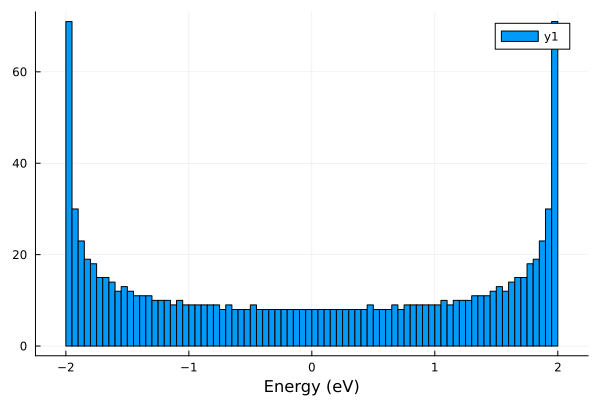

In [14]:
histogram(eigvals(H), nbins = 100, xlabel = "Energy (eV)")

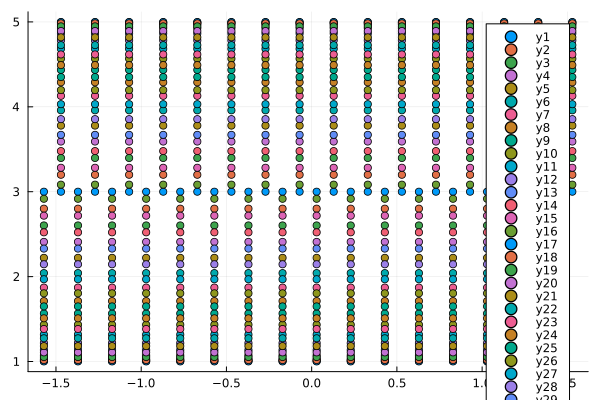

In [25]:
a = 1; ks = -π/2:0.1:π/2
spectrum(k) =eigvals([3 2*1*cos(k*a); 2*1*cos(k*a) 3])
scatter(ks, spectrum.(ks))